In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

In [2]:
##Data Aquisition
me = np.load('MG_3jet/me_3jet_10.npy', allow_pickle=True) #Matrix elements
momentum = np.load('MG_3jet/mom_3jet_10.npy', allow_pickle=True, encoding='bytes') #4-momenta of input states
momentum = np.array([np.array(element) for element in momentum])

In [3]:
##Minkowski product of 4-vectors p1, p2.
def m_prod_arr(p1, p2):
    #Input: p1, p2 - n x 4 dimensional numpy array.
    #Output: n dimensional numpy array.
    return np.multiply(p1[:,0], p2[:,0]) - np.sum(np.multiply(p1[:,1:], p2[:,1:]), axis=1)

In [4]:
def m_prod(p1, p2):
    return np.multiply(p1[0], p2[0]) - np.sum(np.multiply(p1[1:], p2[1:]))

In [5]:
#Helpful sums
p_12 = np.sum(np.array(momentum)[:,2:4], axis=1) #p1+p2
p_13 = np.sum(np.array(momentum)[:,2:5:2], axis=1) #p1+p3
p_23 = np.sum(np.array(momentum)[:,3:5], axis=1) #p2+p3

In [6]:
s_12 = m_prod_arr(p_12, p_12)
s_13 = m_prod_arr(p_13, p_13)
s_23 = m_prod_arr(p_23, p_23)
S = s_12 + s_13 + s_23 #Center of mass energy

In [7]:
x1 = np.divide(s_12, S)
x2 = np.divide(s_13, S)
x3 = np.divide(s_23, S)


x2i = np.linspace(0, 1, 500) #x1 coordinates
x3i = np.linspace(0, 1, 500) #x2 coordinates
X2i, X3i = np.meshgrid(x2i, x3i) #2d regularly spaced grid of coordinates.

In [8]:
#Value at grid coordinate is mapped to the nearest actual datapoint.
grid = griddata((x2, x3), me, (X2i, X3i), method='linear') 

Text(0.5,0,'x3')

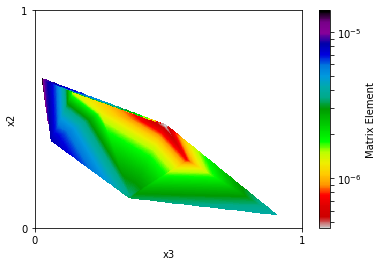

In [9]:
fig, ax = plt.subplots()
im = ax.pcolor(grid, cmap = 'nipy_spectral_r', norm = colors.LogNorm()) #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Matrix Element')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('x2')
ax.set_xlabel('x3')

In [10]:
def analytic_me(q1, q2, p1, p2, p3):
    constants = 1
    return constants*(m_prod(p1, q1)**2 + m_prod(p1, q2)**2 + m_prod(p2, q1)**2 + m_prod(p2, q2)**2)/(m_prod(p1, p3)*m_prod(p2, p3))

In [11]:
print(momentum[2])
print(analytic_me(*momentum[2])/me[2])


[[ 3.16227766e+02  0.00000000e+00  0.00000000e+00  3.16227766e+02]
 [ 3.16227766e+02  0.00000000e+00  0.00000000e+00 -3.16227766e+02]
 [ 4.24988561e-01 -3.51952239e-01 -5.38627522e-02 -2.32042458e-01]
 [ 3.20563730e-01  2.29410179e-01 -1.57037257e-01  1.59597540e-01]
 [ 2.54447709e-01  1.22542061e-01  2.10900009e-01  7.24449182e-02]]
1531394971792.6724


In [12]:
ka,kb,k1,k2,k3 = momentum[2]
swapped = [ka,kb, k3,k2,k1]
print(analytic_me(*momentum[2]))
analytic_me(*swapped)

5389265.715798442


899772.7680499717

In [13]:
for i in range(40):
    print(analytic_me(*momentum[i])/me[i])

1531394971792.6814
1531394971792.673
1531394971792.6724
1531394971792.677
1531394971792.6733
1531394971792.6646
1531394971792.682
1531394971792.6711
1531394971792.6755
1531394971792.6702


IndexError: index 10 is out of bounds for axis 0 with size 10

In [14]:
momentum[13]

IndexError: index 13 is out of bounds for axis 0 with size 10

In [15]:
print(sum([(analytic_me(*momenta)/S[0] - me[i])**2 for i, momenta in enumerate(momentum)])/len(me))

95222450105292.0


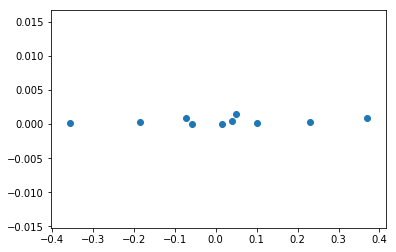

In [16]:
plt.scatter(momentum[:,3,1], 100*me)

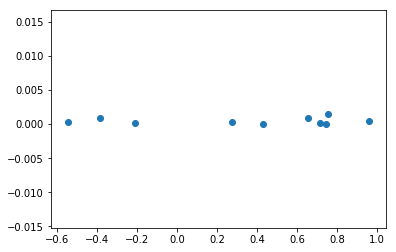

In [17]:
plt.scatter(momentum[:,2,3]/momentum[:,2,0], 100*me)